In [ ]:
import urllib.request
import sys
from bs4 import BeautifulSoup
import csv
import os
import json


In [1]:
import keras

Using TensorFlow backend.


In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [ ]:
url_list = []
final_data = {}
folder_num = 3
final_list = []
try:
    #Change the path here! - Locationof CSV file downloaded from website
    with open('data.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        next(readCSV)
        for row in readCSV:
            url_list.append(row[20])

    for url in url_list:
        print(url) 
        headers = {}
        headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'
        req = urllib.request.Request(url, headers=headers)
        res = urllib.request.urlopen(req)
        resData = res.read()
        soup = BeautifulSoup(resData, 'html.parser')

        data = soup.find_all('img')[0]

        server_image_link = str(data.get('src'))


        try:
            all_image_url = []
            i = 1 
            while(i < 50):
                j = 0
                while(j < 10):
                    try:
                        print(str(i)+str(j))
                        image_url = server_image_link[:-5]+str(i)+"_"+str(j)+".jpg"
                        data2 = urllib.request.urlopen(image_url).read()
                        all_image_url.append(image_url)
                        #Change the path here! - Create folder where all file is stored
                        directory = "/Users/malaikannan/Documents/Work/Data/Transferlearning"+str(folder_num)+"/"
                        if not os.path.exists(directory):
                            os.makedirs(directory)
                        file_name = image_url.split("/")[-1]
                        with open(directory+file_name, "wb" ) as code :
                            code.write(data2)
                        j = j+1
                    except:
                        j = j+1
                        continue    
                i = i+1
            final_data = {'Name': str(folder_num),
                          'Image_urls': all_image_url,
                          'Folder_name': str(folder_num),
                          'Address': str(data.get('title')),
                        }
            final_list.append(final_data)
            print(final_list)

        except Exception as e:
            data3 = urllib.request.urlopen(str(data.get('src'))).read()
            #Change the path here! - Create folder where all file is stored
            directory = "/Users/malaikannan/Documents/Work/Data/Transferlearning"+str(folder_num)+"/"
            if not os.path.exists(directory):
                os.makedirs(directory)
            with open( directory+str(1)+".jpg", "wb" ) as code :
                code.write(data3)

            final_data = {'Name': str(folder_num), 
                               'Image_urls':all_image_url,
                               'Folder_name': str(folder_num),
                               'Address': str(data.get('title')),
                                }
            final_list.append(final_data)
            folder_num = folder_num + 1

    print("Done!")
    #Output jsonfile
    #Structure: data: list of dictonaries
    #every dic contains Name, Image_urls, Folder_name, Address
    with open('final_data.json', 'w') as fp:
        json.dump({'By':"Malai","data":final_list}, fp)


except Exception as e:
    print(e)

In [38]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import h5py
from keras.applications.vgg19 import VGG19

model = VGG16(weights='imagenet', include_top=True)
model_19 = VGG19(weights='imagenet', include_top=True)

model.layers.pop()
model_19.layers.pop()


img_path = '/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.Plan-216831_1_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features_19 = model_19.predict(x)

In [40]:
features.shape

(1, 1000)

In [14]:
features_19.shape

(1, 1000)

In [16]:
from IPython.display import display, Image, HTML
from keras.preprocessing import image as kimage
import skimage.io
import scipy.sparse as sp


In [34]:
import os
file_name_list = []
rootdir = '/Users/malaikannan/Documents/Work/Data/Transferlearning3/'
for root,dirs, files in os.walk(rootdir):
    for file in files:
        if ".jpg" in file:
            file_name_list.append(file)

        

In [35]:
len(file_name_list)

4504

In [36]:
image_features_list = np.zeros(shape=(len(file_name_list),1000))

In [ ]:
for counter, value in enumerate(file_name_list):
    img_path = rootdir + value
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    image_features_list[counter] = features

In [46]:
from gensim.models import KeyedVectors
import pickle

a = str(len(image_features_list))
b = str(len(image_features_list[0]))

with open('textvectorforgensim.txt', 'w') as f:
    f.write(a+' '+b+'\n')
    for i,vector in enumerate(image_features_list):
        f.write(str(i) + ' ' +  (' '.join(str(v) for v in vector)) + '\n' )

print('txtfilecreated')        
model = KeyedVectors.load_word2vec_format('textvectorforgensim.txt', binary=False)
print('modelloaded')   
model.save_word2vec_format('SentenceSimGensimModel.bin', binary=True)
print('savemodelcompleted')


txtfilecreated
modelloaded
savemodelcompleted


In [75]:
output = model.most_similar(positive=[image_features_list[2505]], topn=10)


/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803661_5_0.jpg


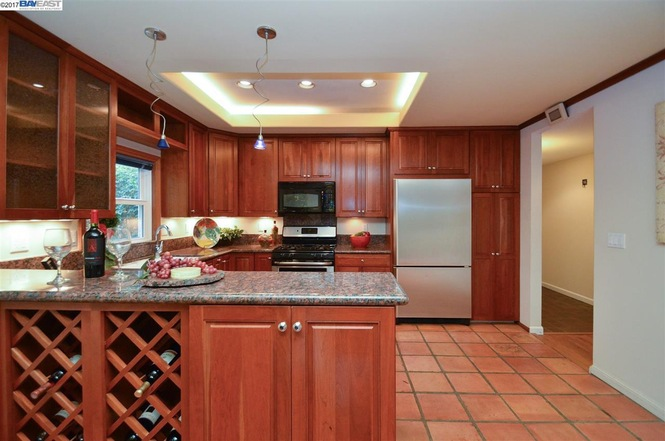

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40800777_7_1.jpg


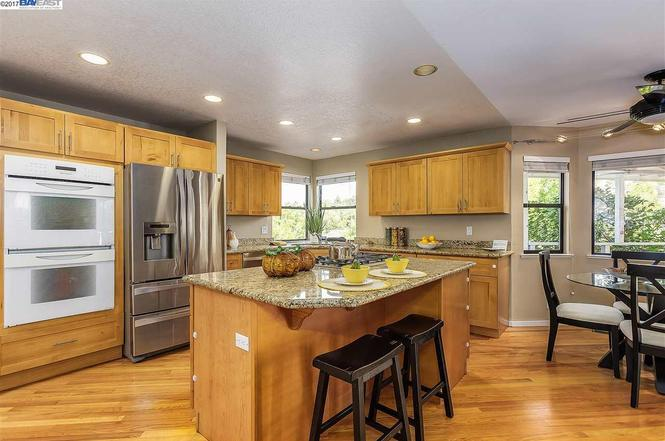

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803661_4_0.jpg


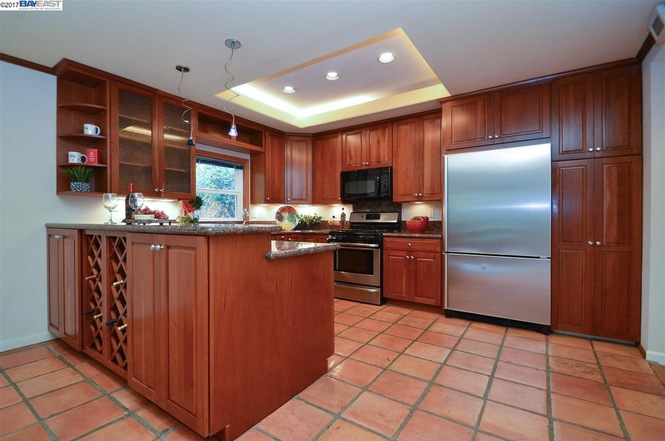

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40800777_8_1.jpg


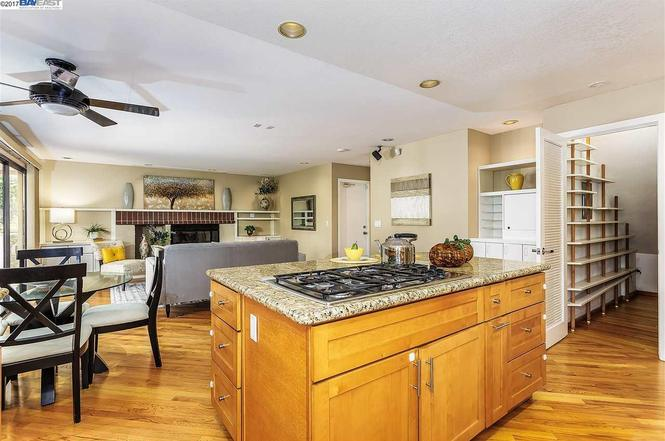

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803381_10_1.jpg


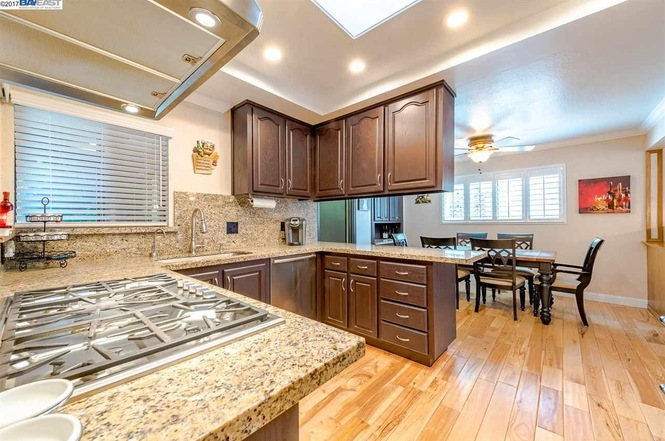

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40803381_10_0.jpg


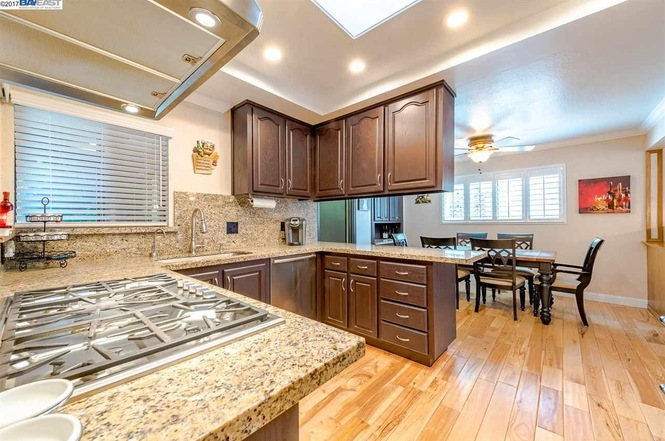

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.40802027_5_0.jpg


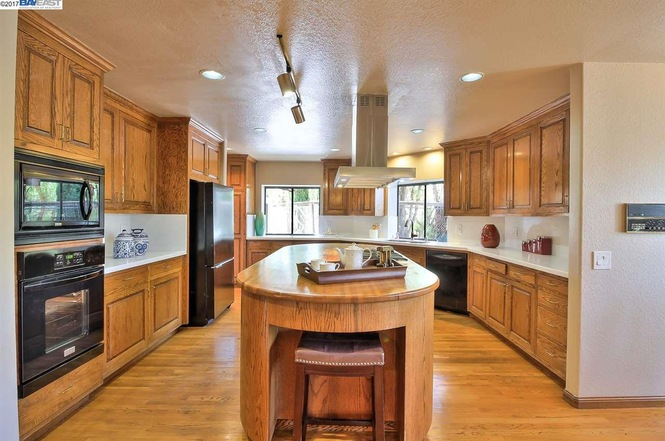

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81683673_8_3.jpg


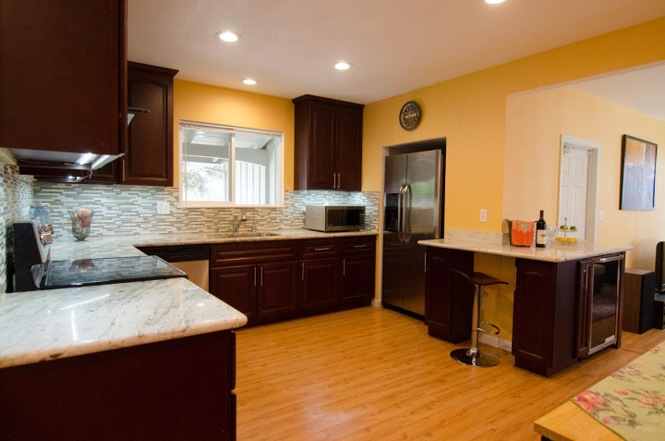

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81683673_8_2.jpg


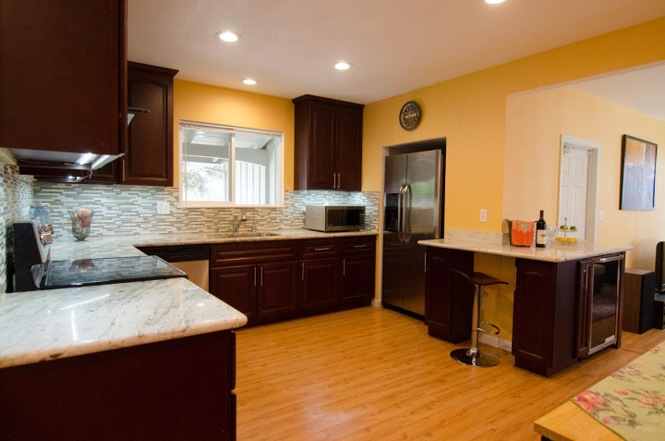

/Users/malaikannan/Documents/Work/Data/Transferlearning3/genMid.ML81683673_8_4.jpg


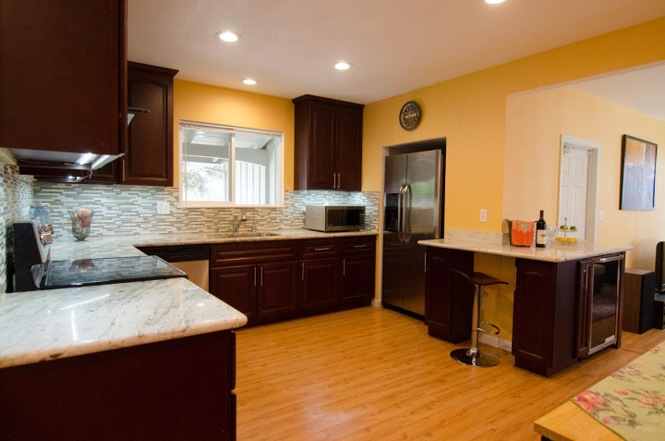

In [76]:
for item in output:
    img_file_name= '/Users/malaikannan/Documents/Work/Data/Transferlearning3/' + file_name_list[int(item[0])]
    print(img_file_name)
    display(Image(filename=img_file_name)) 

In [53]:
for counter,name in enumerate(file_name_list):
    if "genMid.40803661_5_0.jpg" in name:
        print(counter)

2505


In [70]:
for counter,name in enumerate(file_name_list):
    if "genMid.40803661_14_0.jpg" in name:
        print(counter)


2495
